# Regression Exercise
Using Regression to predict wine quality.

## Import Our Libraries

In [18]:
# PANDAS IS FOR DATA WRANGLING
import pandas as pd

# SEABORN IS A PLOTTING LIBRARY
import seaborn as sns

# MATPLOT LIB IS ALSO A PLOTTING LIBRARY
import matplotlib.pyplot as plt

# IMPORT OUR LINEAR REGRESSION MODEL
from sklearn.linear_model import LinearRegression

# IMPORT OUR RANDOM FOREST REGERSSOR MODEL
from sklearn.ensemble import RandomForestRegressor

# IM LEAVING THERES HERE BECAUSE IM NICE
# METRICS HELP US SCORE OUR MODEL
from sklearn import metrics

# HELP US SPLIT OUR DATA INTO TESTING A TRAINING
from sklearn.model_selection import train_test_split

# HELPER FUNCTION WITH Z-SCORES TO REMOVE OUTLIERS
import scipy.stats as stats

%matplotlib inline

# Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.

# STEP 1 (i): Inspect and explore data
1. Use `data/winequality-white.csv`

In [19]:
# READ IN THE DATA USING PANDAS 
df = pd.read_csv('data/winequality-white.csv')

# DISPLAY THE FIRST 5 ROWS
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide    pH  sulphates  alcohol  \
0                 45.0                 170.0  3.00       0.45      8.8   
1                 14.0                 132.0  3.30       0.49      9.5   
2                 30.0                  97.0  3.26       0.44     10.1   
3                 47.0                 186.0  3.19       0.40      9.9   
4                 47.0                 186.0  3.19       0.40      9.9   

   quality  
0        6  
1        6  
2        6  
3        6  
4        6

# Inspect our data using `df.describe()` function.

In [20]:
# Inspect our data using `df.describe()` function.
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4893.000000       4893.000000  4893.000000     4893.000000   
mean        6.854210          0.278221     0.334139        6.393736   
std         0.843637          0.100831     0.121048        5.072990   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide           pH  \
count  4893.000000          4893.000000           4893.000000  4893.000000   
mean      0.045791            35.310035            138.383507     3.188144   
std       0.021850            17.011384             42.509982     0.151011   
min       0.009000             2.000000              9.000000     2.720000   
25%       0.036000            23.000000            108.000000     3.090000   
50%       0.043000            34.000000            134.000000     3.180000   
75%       0.050000            46.000000            167.000000     3.280000   
max       0.346000           289.000000            440.000000     3.820000   

         sulphates      alcohol      quality  
count  4893.000000  4893.000000  4893.000000  
mean      0.489871    10.512565     5.874719  
std       0.114151     1.229755     0.880446  
min       0.220000     8.000000     3.000000  
25%       0.410000     9.500000     5.000000  
50%       0.470000    10.400000     6.000000  
75%       0.550000    11.400000     6.000000  
max       1.080000    14.200000     8.000000

# Check for Nulls.

In [21]:
# Check for Nulls.
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Check for Duplicates

In [22]:
# Check for Duplicates
df.duplicated().sum()


937

In [23]:
# Remove duplicates
print(df.shape)


# REMOVE DUPLICATES HERE
df = df.drop_duplicates()

# Sanity check
print(df.shape)

(4893, 11)
(3956, 11)


# Visualize our data to discover outliers.
* Use `sns.pariplot`

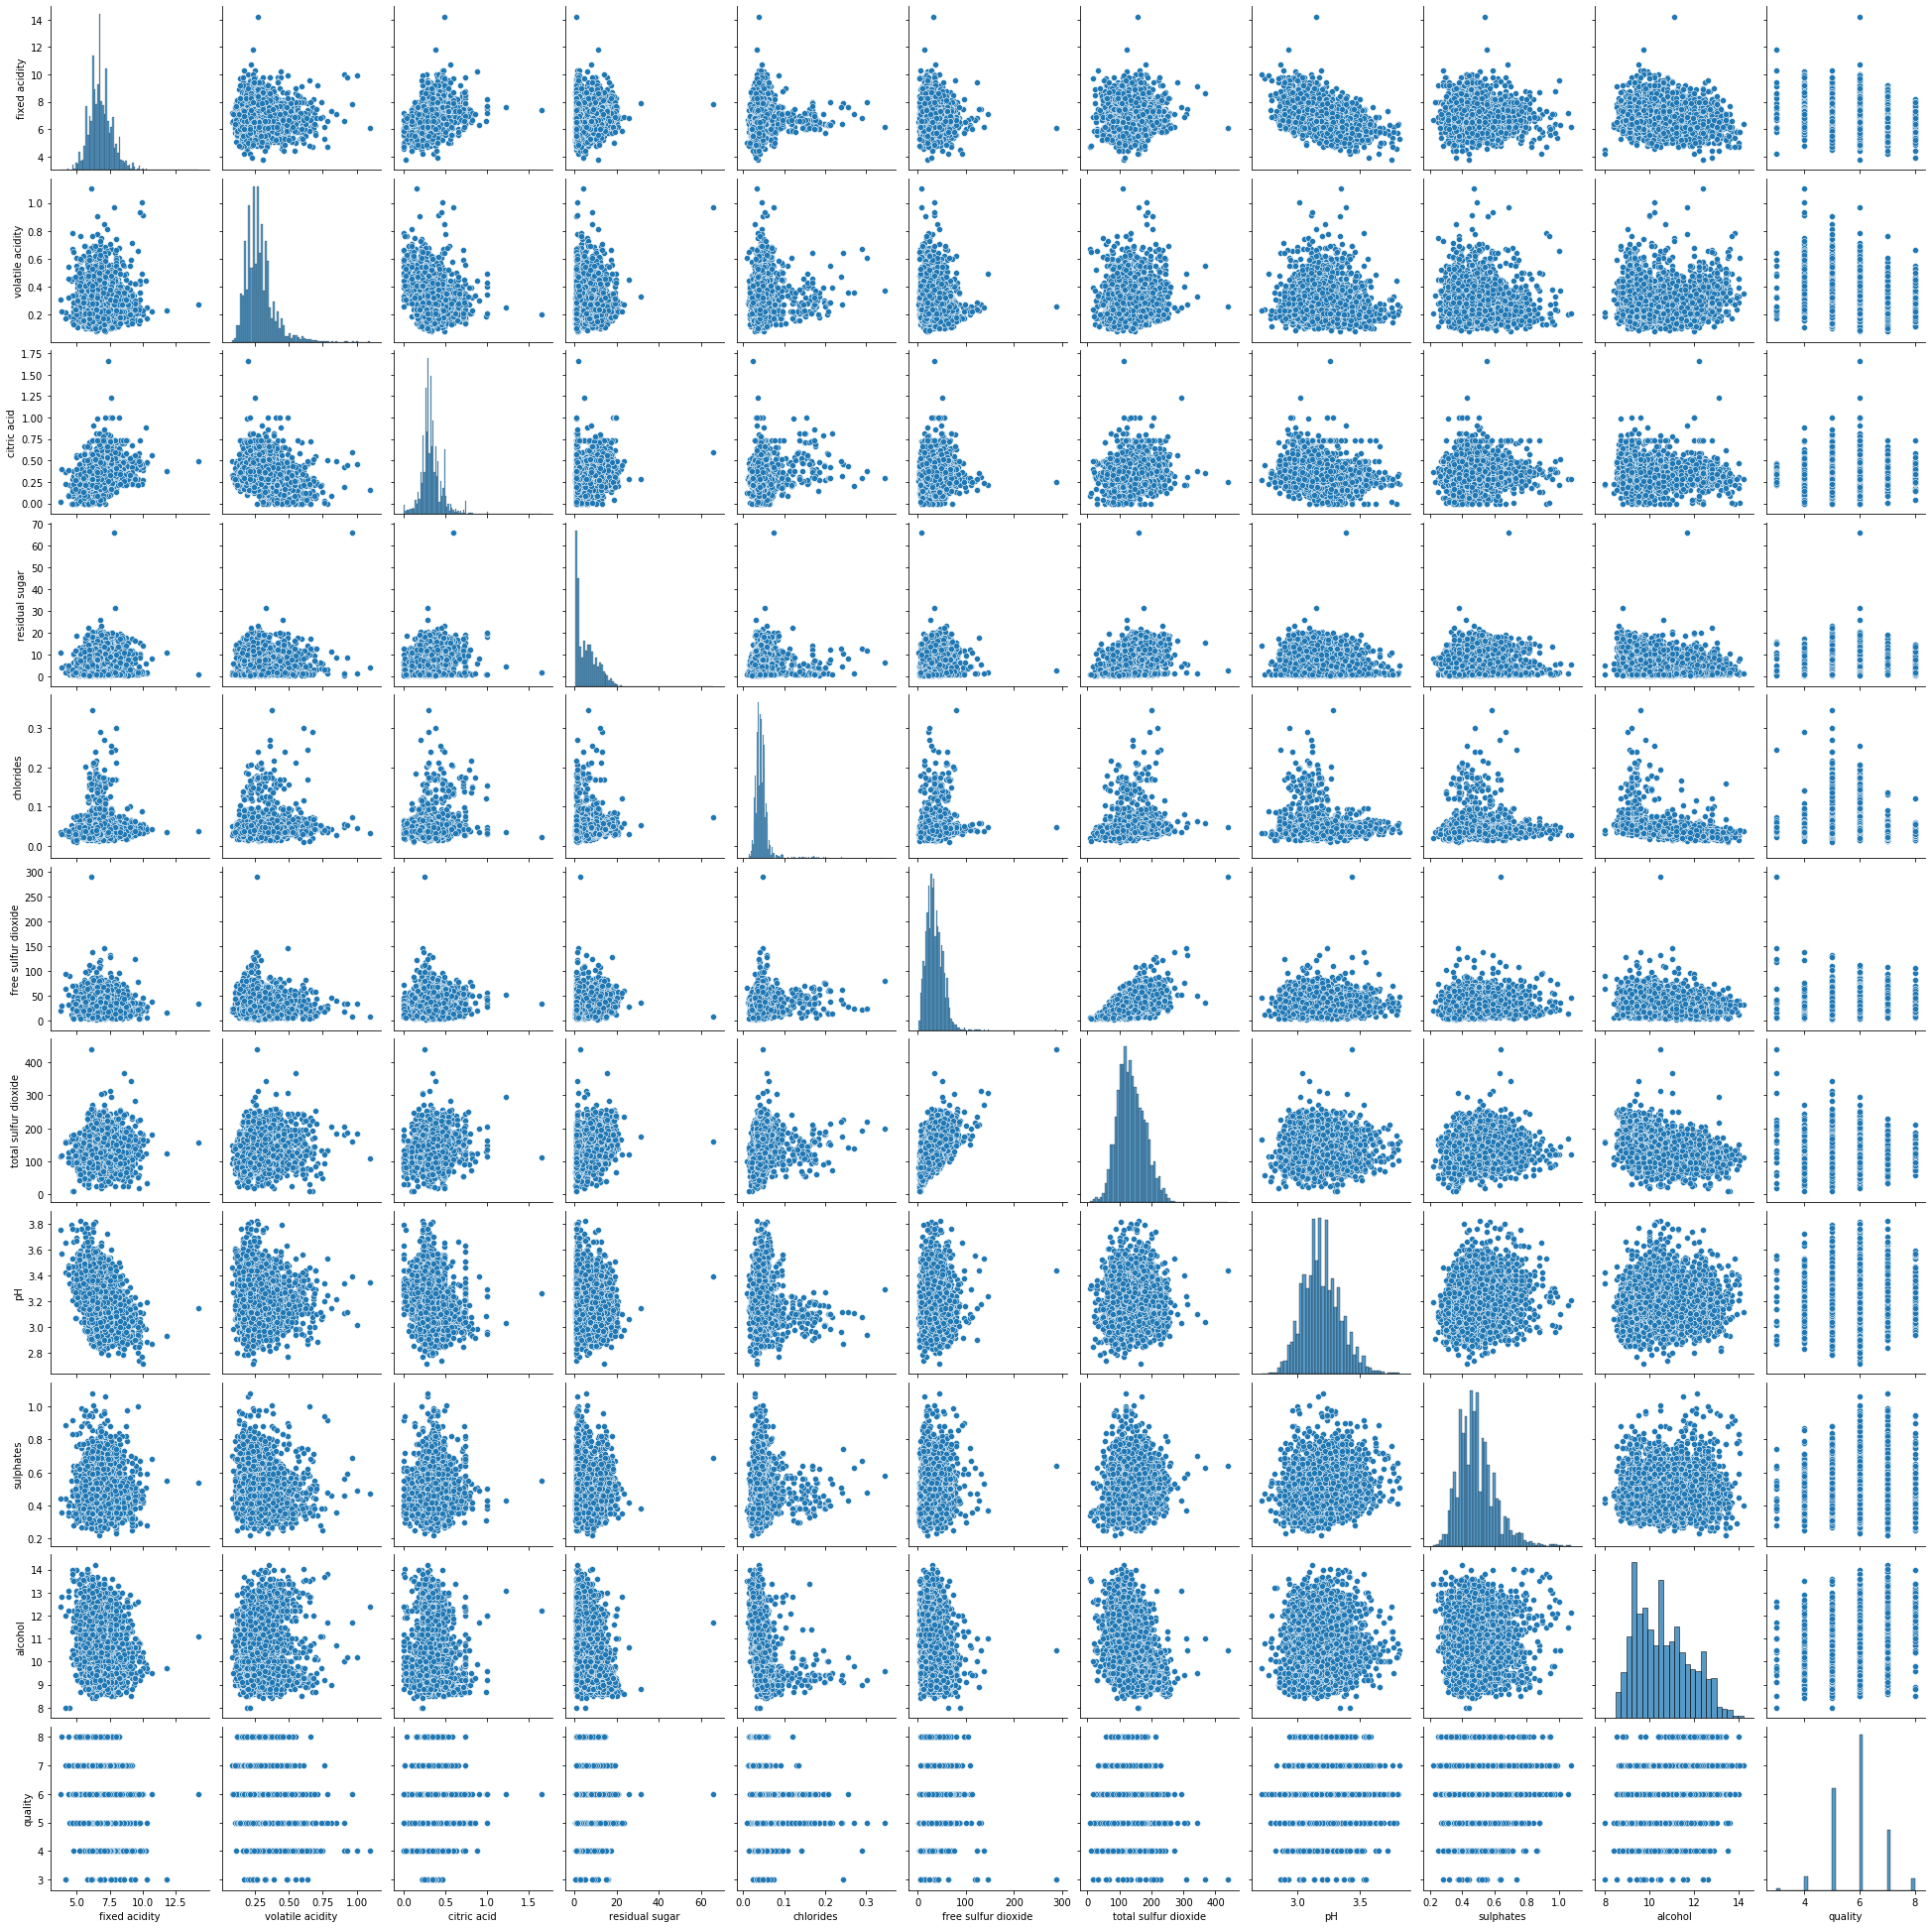

In [24]:
# Visualize our data to discover outliers.
sns.pairplot(data=df)

___
# STEP 2  (s):  Select and Engineer Features

# Remove outliers
* Make sure you DO NOT remove outliers from our target variable of `quality`.

In [25]:
# Keep this for later
original_cols = df.columns

# Set the columns you want to remove outliers for
target_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
        'chlorides', 'free sulfur dioxide', 'pH', 'sulphates', 'alcohol']

# Make a new list that is going to contain our z-score
z_score_cols = []

# Loop through our target columns
for col in target_cols:
    # Make the new column name the same as the original but with 'z_score' added to it
    new_column_name = col + 'z_score'
    
    # Set the new column equal to the score
    df[new_column_name] = stats.stats.zscore(df[col])
    
    # Set the z-score to its absolute value of the for easier filtering
    df[new_column_name] = abs(df[new_column_name])
    
    # Append the new column name our our z_score_cols list for easier access for later.
    z_score_cols.append(new_column_name)


condition = df[z_score_cols] < 3

# Say TRUE only if all of the rows are True, else return False
condition = condition.all(axis=1)

print('Before removal of outliers', df.shape)

# Apply our condition to our dataframe and replace our current dataframe with the applied condition.
df = df[condition]

print('After removal of outliers', df.shape)

Before removal of outliers (3956, 20)
After removal of outliers (3634, 20)


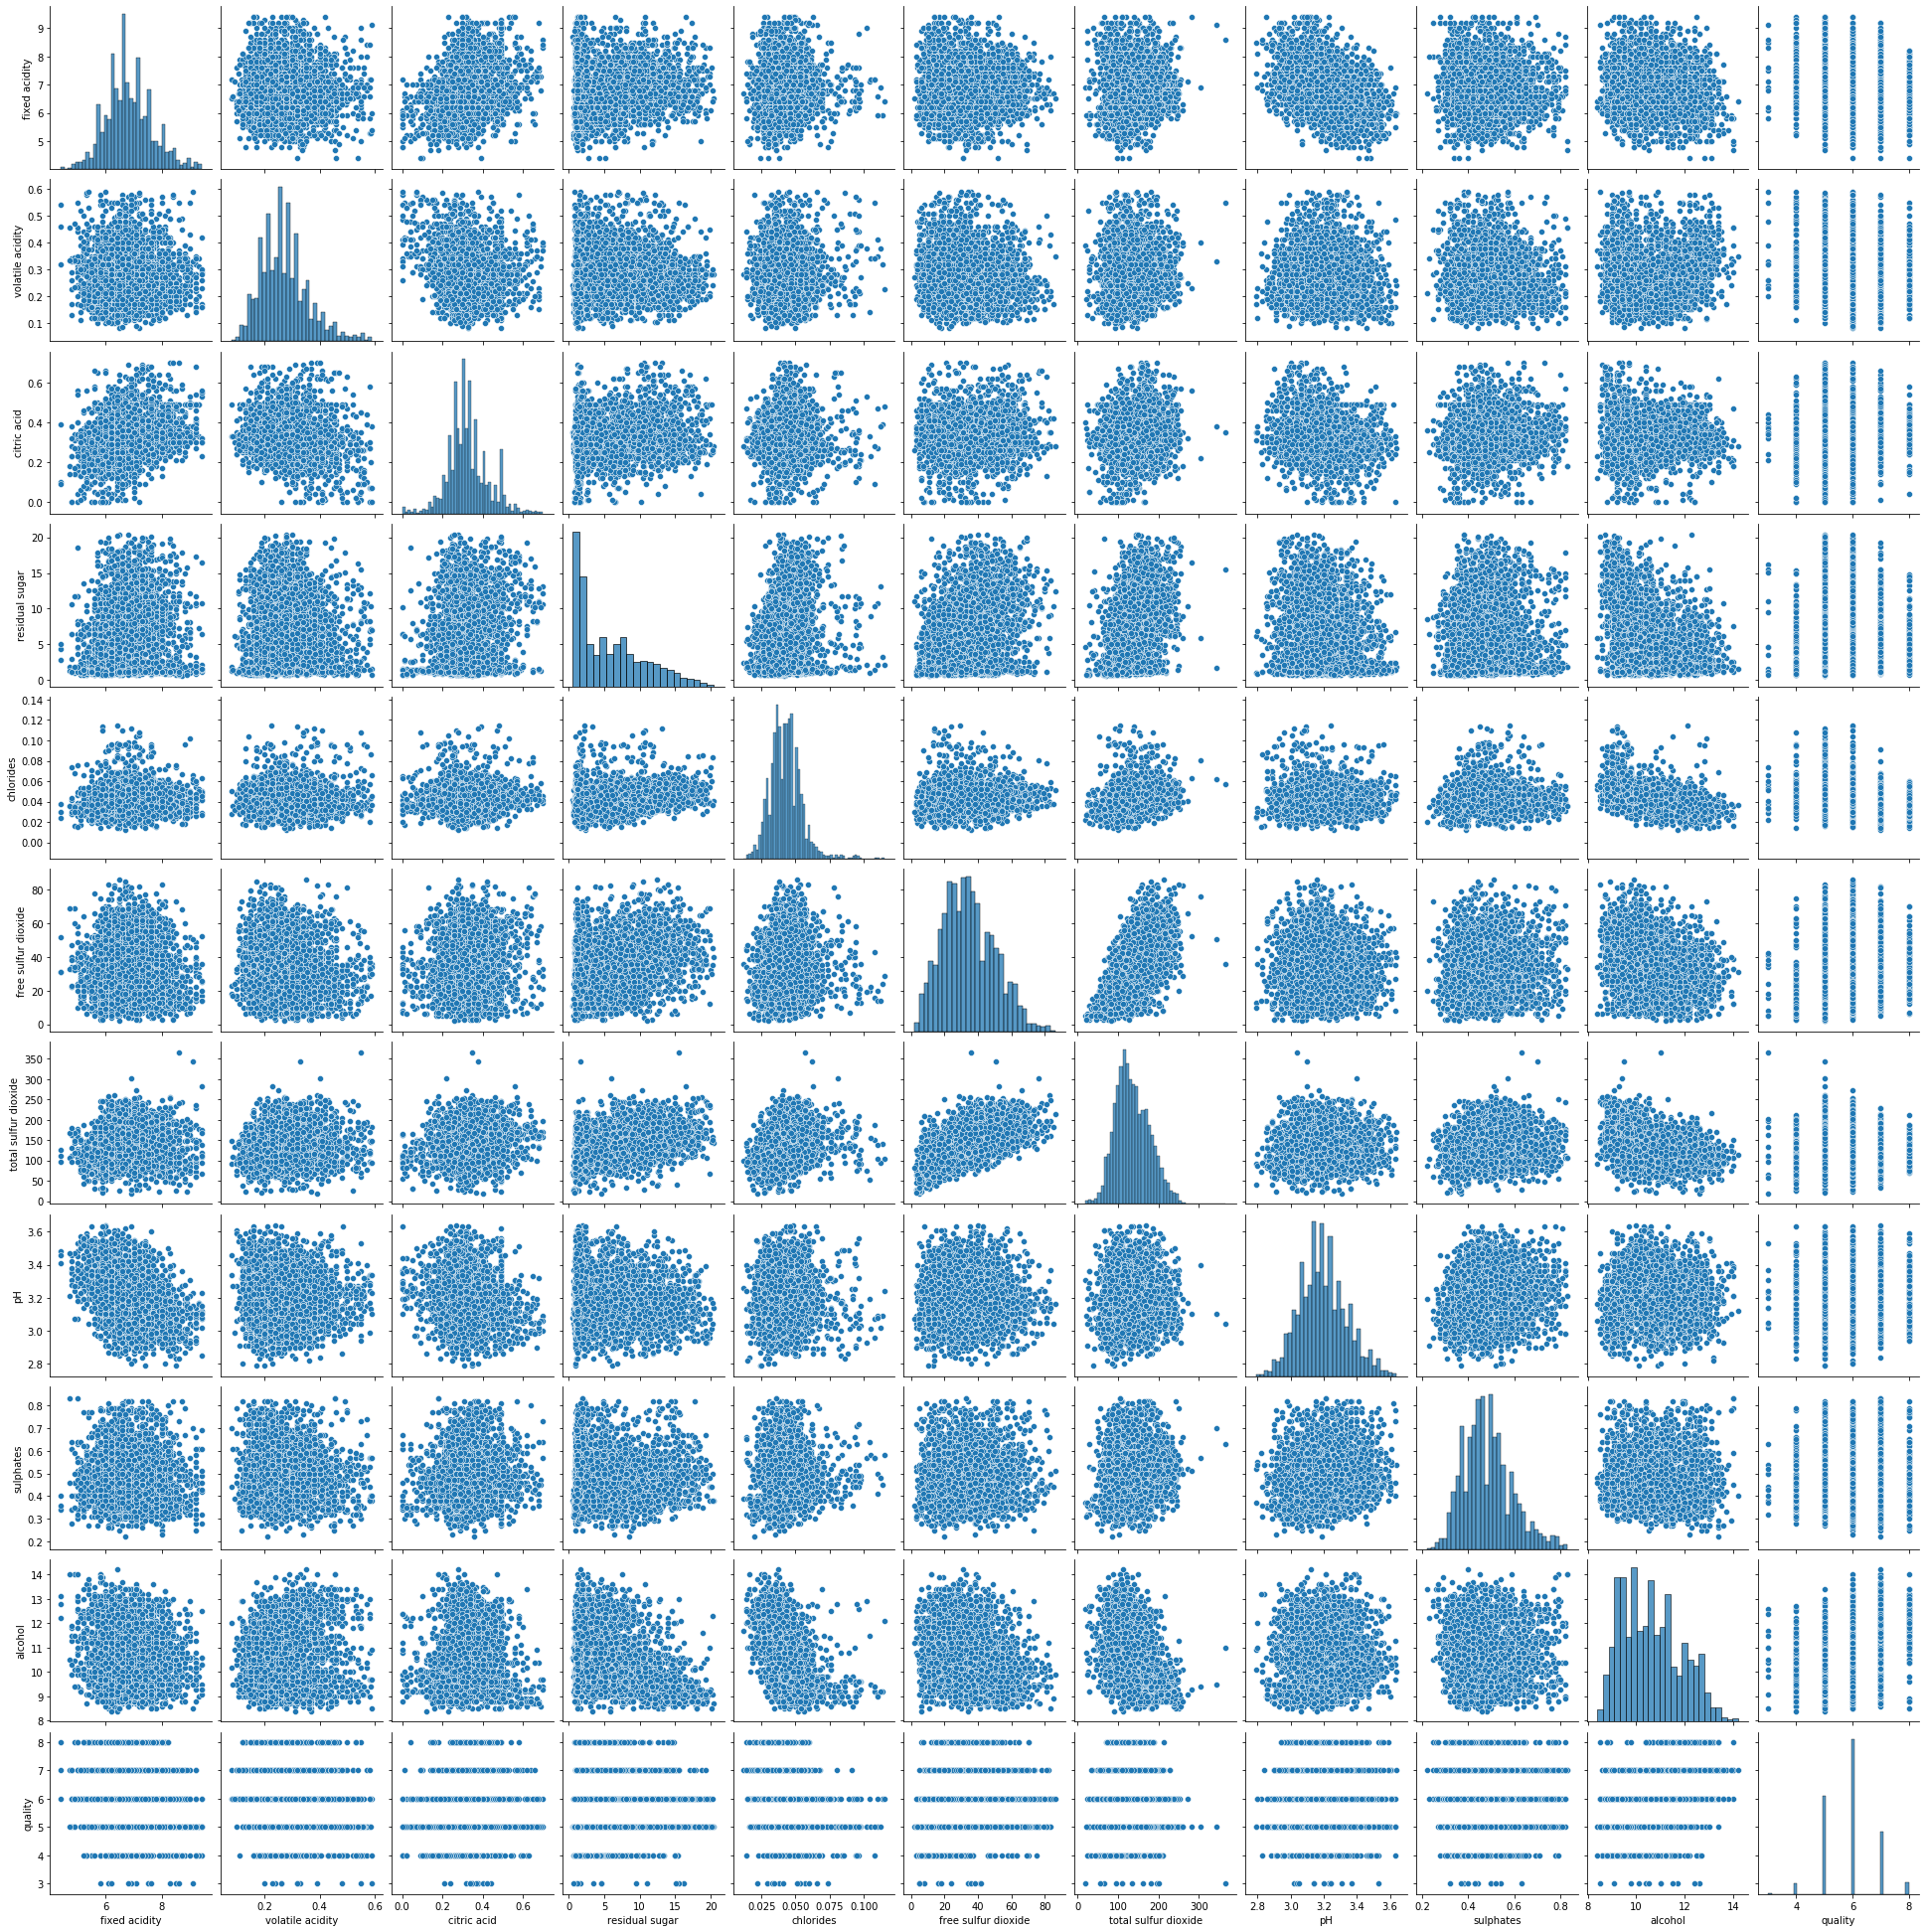

In [26]:
# Keep only original columns
df = df[original_cols]

# Visualize using sns.pairplot again to see if outliers were removed. 
sns.pairplot(data=df)

# Find which features have a linear relationship with quality.
* Plot below the linear relationship between each variable against quality.
* Use `sns.relplot`

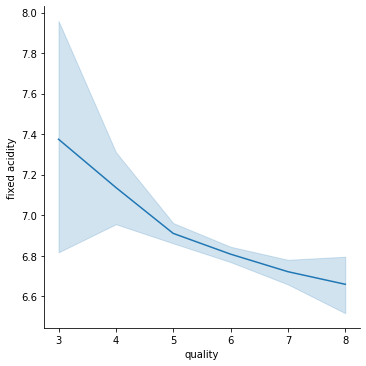

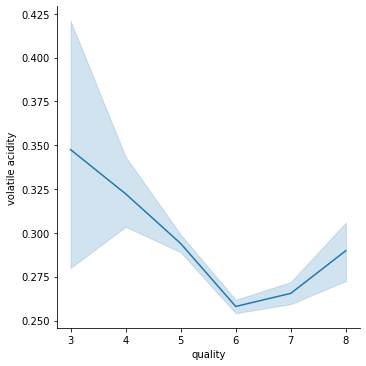

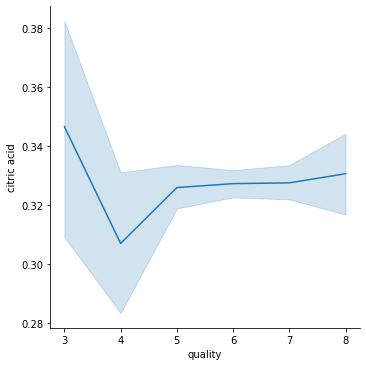

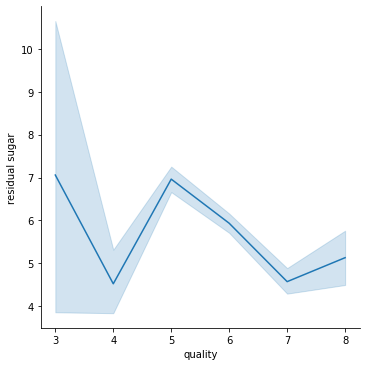

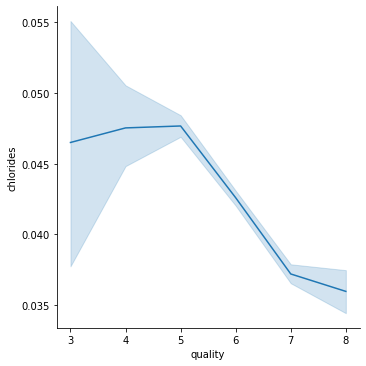

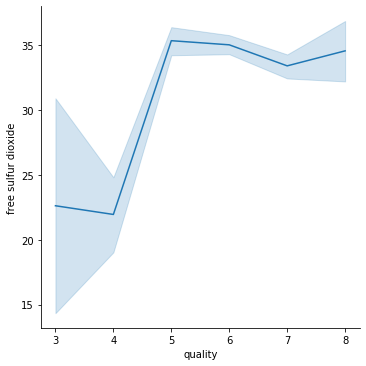

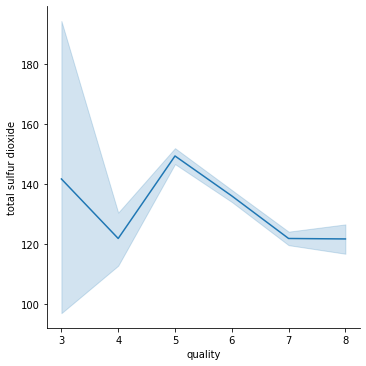

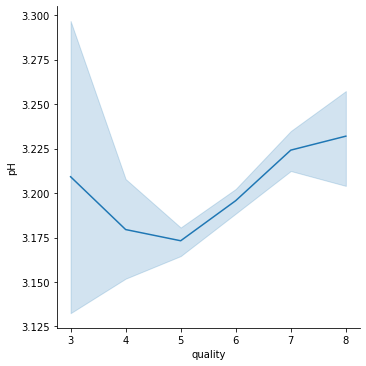

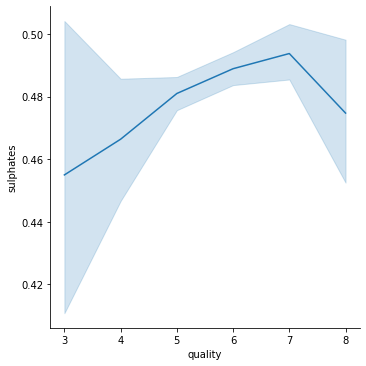

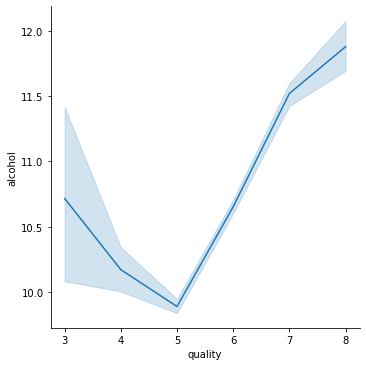

In [27]:
# Plot below the linear relationship between each variable against quality

all_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
               'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                   'pH', 'sulphates', 'alcohol']

# YOURE GOING TO NEED TO USE A LOOP
for feature in all_features:
    sns.relplot(data=df, y=feature, x = 'quality', kind='line', height=5, aspect = 1)

# Select your predictor features and your target variable.
1. Keep only the features that have a linear relationship.  Store them as a list called `selected_features`
2. Define your `X` and `y` variables
3. Split our data into a training set and a testing set.

In [30]:
# 1. Keep only the features that have a linear relationship.  Store them as a list called `selected_features`
selected_features = ['fixed acidity', 'chlorides', 'volatile acidity', 'free sulfur dioxide', 'pH',
                     'alcohol', 'sulphates']
target = ['quality']

In [31]:
# Define your X and y variables
X = df[selected_features].values


# 
y = df[target].values

In [32]:
# 3. Split our data into a training set and a testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

___
# STEP 3 (b): Build and train our model
1. Initialize our Linear Regression model.
2. Use our training data to fit aka train our model.


In [33]:
# 1. Initialize our Linear Regression model.
model = LinearRegression()


In [34]:
# 2. Use our training data to fit aka train our model.
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

___
# STEP 4 (e): Evaluate model.
1. Make new predicitions using our testing data.
2. Calculate R-Squared and Mean Absolute Error socres

In [35]:
# 1. Make new predicitions using our testing data.
y_pred = model.predict(X_test)
y_pred

array([[7.34231705],
       [5.19404184],
       [6.44923431],
       [5.91154054],
       [5.64702801],
       [6.50594002],
       [5.96114944],
       [5.43013254],
       [5.82420014],
       [5.26686245],
       [6.75410562],
       [6.85099511],
       [5.63930384],
       [5.69940897],
       [6.12993679],
       [4.8437469 ],
       [6.11959535],
       [5.53638195],
       [6.28948347],
       [6.2408708 ],
       [5.77238087],
       [6.08795445],
       [6.45285315],
       [5.77228076],
       [5.81204392],
       [6.09489222],
       [5.78022976],
       [5.58785637],
       [5.70997168],
       [5.71478337],
       [6.93302874],
       [6.47095679],
       [5.32336233],
       [5.17587988],
       [5.97736449],
       [5.07217711],
       [5.30076475],
       [5.66715387],
       [6.24393046],
       [5.78212818],
       [6.81019696],
       [6.83659177],
       [5.8130966 ],
       [5.25100832],
       [5.08972287],
       [5.71732902],
       [6.47789181],
       [6.407

# Now lets see how well the model explains the data by finding the R-Squared.
* You can think of r-squared as a goodness of fit measure for the model. 
* How well the trendline explains the variance of the data. 
* R-squared measure the strength of the relationship between your model and the dependent variable on a 0-100% scale.
* Remember for human labeled data like the quality of wine, .3 is pretty good.

In [36]:
# 2. Calculate R-Squared and Mean Absolute Error socres

r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)

# USE SKLEARN'S MEAN_ABSOLUTE_ERROR FUNCTION TO SCORE OUR PREDICTIONS VS OUR ACTUAL
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

R-Squared Score: 0.2608239405548113
Mean Absolute Error: 0.5722337878422188


# Saving and exporting our model for future use.
* Use the library pickle to export the pickle

In [39]:
import pickle

# NAME YOUR MODEL 
filename = 'white-wine-model.pkl'

# EXPORT AND SAVE YOUR MODEL USING YOUR FILENAME
pickle.dump(model, open(filename, 'wb'))

___
# Random Forest Regression

Without step by step guidance, in the cell below, build a Random Forest Regression model and compare the r-squared and mean absolute error scores to the Linear Regression model.
* Dont forget, Random Forest can handle non-linear features!

* When splitting your data, make sure to use the same random state as you did for your Linear Regression model
    * `train_test_split(???, random_state=1)`

* Dont forget about `GridSearchCV` from our last lecture :) 

1. Which model proved to have better scores.
2. Why do you think that is...?


In [40]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
6            6.2              0.32         0.16             7.0      0.045   
9            8.1              0.22         0.43             1.5      0.044   

   free sulfur dioxide  total sulfur dioxide    pH  sulphates  alcohol  \
1                 14.0                 132.0  3.30       0.49      9.5   
2                 30.0                  97.0  3.26       0.44     10.1   
3                 47.0                 186.0  3.19       0.40      9.9   
6                 30.0                 136.0  3.18       0.47      9.6   
9                 28.0                 129.0  3.22       0.45     11.0   

   quality  
1        6  
2        6  
3        6  
6        6  
9        6

In [41]:
# Do complete Random Forest Regression model here...
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol']
target = ['quality']
X = df[features].values
Y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)
r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

#

/Users/rose/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


[6.97 5.3  6.59 5.73 5.43 6.58 5.63 5.94 5.34 5.51 6.51 7.03 5.4  6.2
 5.88 5.19 6.3  5.56 5.99 6.12 6.04 6.09 6.41 6.16 5.58 6.   6.1  5.38
 5.91 5.61 6.9  6.93 5.65 5.22 5.26 5.15 5.26 5.26 5.31 5.77 6.73 7.1
 6.15 5.33 5.08 5.61 6.19 6.39 5.64 6.42 5.91 6.38 5.32 4.74 6.25 6.28
 6.32 6.07 5.79 6.61 6.38 5.37 6.73 5.98 6.42 6.89 5.64 5.93 5.92 5.52
 6.14 5.15 6.36 5.09 5.84 6.83 5.2  5.74 5.16 5.11 6.6  6.68 6.61 5.44
 5.87 6.14 5.74 6.18 6.37 6.09 6.72 5.55 5.69 7.   6.38 6.21 5.54 5.57
 5.5  5.57 5.03 5.69 6.24 6.55 5.81 6.01 7.01 6.76 5.83 5.84 4.3  6.26
 5.46 4.53 6.31 5.52 6.21 6.55 5.22 5.56 7.27 5.08 6.24 6.18 7.1  6.53
 6.42 6.17 6.42 5.82 4.94 5.13 6.65 6.26 5.97 6.66 6.14 5.26 6.06 5.48
 6.47 7.15 6.6  5.15 6.23 6.67 4.53 6.08 6.94 5.41 5.68 6.19 6.31 6.04
 5.4  5.63 5.21 5.25 6.63 5.1  6.24 5.14 5.89 6.36 5.53 6.34 6.14 6.
 5.49 5.73 5.66 6.1  6.38 5.52 5.65 5.89 5.58 5.7  5.94 5.29 6.28 5.53
 6.34 6.84 5.45 5.68 5.24 5.83 6.03 6.71 5.56 6.1  6.81 6.81 5.35 5.67
 5.3  5.2 

In [42]:
# 1. Which model proved to have better scores.
#Log : r-squared = .2608, mean absolute error = .5722
#RanF : r-squared = .3403, mean absolute error = .5329

print('The Random Forest Regression Model proved have better scores')

The Random Forest Regression Model proved have better scores


In [44]:
# 2. Why do you think that is...?


print('The R-score for the Linear Regression Model was ~.2608, while the Random Forest Regression Model had a higher R-score of ~.3403, meaning the relationship between the variables was greater')
print('The MAE for the Linear Regression was greater than the MAE for the Random Forest Model')

The R-score for the Linear Regression Model was ~.2608, while the Random Forest Regression Model had a higher R-score of ~.3403, meaning the relationship between the variables was greater
The MAE for the Linear Regression was greater than the MAE for the Random Forest Model
